In [ ]:
# Demonstrate the process of making the data ready-to-use in Machine Learning algorithms

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
import os
os.chdir('/Users/Tony/Desktop/Structured Data')

In [7]:
data = pd.read_csv('credit_demo.csv',na_values = ['Missing', 'n/a', 'N/A','NA', ""])

In [8]:
# Let's look at the various columns in the data

data.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default'],
      dtype='object')

In [9]:
# often we will partition the data into training and testing
# We will build the model on Training data, and later validate the model on the Testing data

data_train=data.sample(frac=0.80,random_state=200)
data_test=data.drop(data_train.index)

In [10]:
# Let's start exploring the data

data_train.shape

(2393, 10)

In [11]:
# Let's look at the proportion of defaults vs. non-defaults in the data and training data

data.default.value_counts()

0    2000
1     991
Name: default, dtype: int64

In [12]:
data_train.default.value_counts()

0    1597
1     796
Name: default, dtype: int64

In [13]:
# So in the data we have 33% of deafaults, and the same looks looking at the training data
data.default.value_counts()/data.shape[0]

0    0.668673
1    0.331327
Name: default, dtype: float64

In [14]:
data_train.default.value_counts()/data_train.shape[0]

0    0.667363
1    0.332637
Name: default, dtype: float64

In [15]:
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
0,1,20000,MALE,3,2,35.0,-1,4486.500000,2354.833333,0
1,2,260000,FEMALE,1,2,51.0,-1,14728.166670,11051.333330,0
2,3,360000,FEMALE,1,1,49.0,-2,0.000000,0.000000,0
3,4,450000,FEMALE,1,1,40.0,-2,4494.166667,3764.833333,1
4,5,50000,FEMALE,3,1,47.0,-1,6701.333333,6594.500000,0


In [16]:
# To check if the data has missing values we can use the following function
# Age has 21 values missing

data.isnull().sum()

ID              0
LIMIT_BAL       0
GENDER          0
EDUCATION       0
MARRIAGE        0
AGE            21
PAY_HISTORY     0
BILL_AMT        0
PAY_AMT         0
default         0
dtype: int64

In [17]:
# To do some sanity checks of the data we can use the function .describe() - statistical summary of the data

pd.options.display.float_format = '{:.0f}'.format
data_train.describe()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
count,2393,2393,2393,2393,2377,2393,2393,2393,2393
mean,1492,187564,2,1,37,-0,19431,5250,0
std,875,130059,1,1,9,2,40486,12145,0
min,1,10000,0,0,21,-2,-4466,0,0
25%,730,80000,1,1,29,-1,1352,833,0
50%,1498,170000,2,1,36,-1,4558,2067,0
75%,2255,260000,2,2,42,2,18412,5281,1
max,3000,800000,6,3,91,8,456958,385692,1


In [18]:
# Now let's export this table in excel

summary = data_train.describe()
summary.to_csv('summary.csv', sep=',')

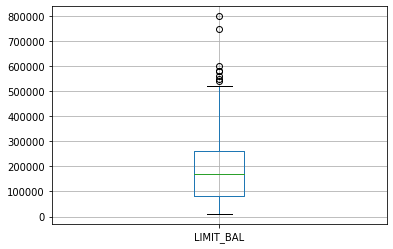

In [19]:
## Data Exploration
data_train.boxplot(column='LIMIT_BAL')
plt.show()

In [20]:
# It looks from the boxplot that there are some extreme values
# Let's see what is at the 99%entile

data_train['LIMIT_BAL'].quantile(0.99)

500000.0

In [21]:
# Now let's expand the data beyond this 99%entile value 

data_train.loc[(data_train["LIMIT_BAL"]>500000)]

# Most of the values are in a continuous range beyond the 99 percentile value
# except maybe 750000 and 800000

# note that both these customers seem to have a good track record of paying credit duly on time
# therefore maybe they have been offered higher credit limits

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1412,1416,510000,FEMALE,1,1,48,-1,9446,8387,0
507,508,510000,MALE,1,1,41,-1,6923,6406,0
1297,1301,600000,FEMALE,3,1,46,-1,19336,17250,0
636,638,750000,FEMALE,3,1,40,-1,25000,35213,0
2979,2989,510000,FEMALE,1,2,40,3,456958,2333,1
239,240,540000,FEMALE,1,2,34,-1,1077,946,0
1518,1522,510000,FEMALE,1,1,37,-1,1212,1338,0
1031,1035,580000,MALE,1,2,31,-1,2986,2866,0
2246,2250,550000,MALE,1,2,31,-1,4582,2567,0
1275,1279,520000,MALE,1,2,39,-1,19802,18907,0


In [22]:
# Let's check column BILL_AMT for negative values

data_train.loc[(data_train["BILL_AMT"]<0)]

# It could be that negative amount can be a result of the customer having extra credit due to cashback
# or extra payments in the past
# So we may not wan to treat this as such

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1107,1111,90000,FEMALE,2,1,36,-1,-124,722,0
2455,2459,500000,FEMALE,4,1,39,-1,-11,408,0
409,410,280000,MALE,1,1,44,-1,-2,1276,0
1914,1918,360000,MALE,2,2,37,-1,-235,917,0
290,291,80000,MALE,1,1,45,-1,-25,463,0
2074,2078,240000,MALE,1,1,36,-1,-8,374,0
2337,2341,290000,MALE,1,1,30,-1,-169,413,0
455,456,150000,FEMALE,1,2,42,-1,-41,833,0
43,44,200000,MALE,1,1,36,-1,-4466,28522,0
2334,2338,300000,MALE,2,2,27,-1,-66,83,0


In [23]:
## Similarly there are extremely high bill amt

data_train.loc[(data_train["BILL_AMT"]>20000)]

# The high bill amt are all under the credit limits
# Most of the high amount can be the result of delinquent payments resulting into higher credit charged

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2157,2161,360000,MALE,2,1,37,-1,101140,17418,0
476,477,30000,MALE,3,1,45,4,28166,1383,1
713,715,190000,MALE,1,1,50,2,72968,2833,1
403,404,100000,FEMALE,3,1,36,2,57795,2883,1
2083,2087,500000,FEMALE,1,2,27,-1,26728,21481,0
1488,1492,30000,FEMALE,3,3,56,2,27735,1113,1
2526,2531,30000,MALE,2,2,39,4,26074,881,1
2950,2958,120000,MALE,1,1,44,2,77718,2533,1
1648,1652,130000,FEMALE,3,2,24,2,49642,1850,1
1438,1442,60000,FEMALE,2,2,48,2,60825,1517,1


In [24]:
# The PAY_AMT summary can also be explained


data_train["PAY_AMT"].quantile(0.99)

49249.96666999986

In [25]:
data_train.loc[(data_train["PAY_AMT"]>50000)]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2117,2121,350000,MALE,1,1,62,-1,72310,72179,0
122,123,360000,MALE,6,1,66,-1,54753,75708,0
728,730,500000,FEMALE,1,1,33,-1,373702,385692,0
751,753,360000,MALE,3,1,53,-1,80748,75048,0
2254,2258,270000,MALE,1,1,39,-1,44687,52475,0
100,101,200000,FEMALE,2,1,58,-1,34143,64586,0
666,668,420000,FEMALE,1,2,33,-1,5694,68090,0
1025,1029,430000,MALE,1,1,40,-1,78971,80522,0
2717,2722,320000,FEMALE,1,2,44,-1,61916,78762,0
1235,1239,500000,FEMALE,2,2,43,-1,147987,119072,0


In [26]:
# To inspect qualitative values we can either use groupby from pandas
# or crosstab function to get the frequency or count of default by gender

In [27]:
pd.options.display.float_format = '{:.2f}'.format
data_train.groupby(['default','GENDER'], as_index=False)["GENDER"].size()/data_train.shape[0]

default  GENDER
0        FEMALE   0.43
         MALE     0.23
1        FEMALE   0.19
         MALE     0.15
dtype: float64

In [28]:
pd.crosstab(data_train.default, data_train.GENDER, margins=True)

GENDER,FEMALE,MALE,All
default,,,
0,1039,558,1597
1,449,347,796
All,1488,905,2393


In [29]:
# percetages illustrated results can be better to interpret

pd.crosstab(data_train.default, data_train.GENDER, margins=True)/data_train.shape[0]

GENDER,FEMALE,MALE,All
default,,,
0,0.43,0.23,0.67
1,0.19,0.15,0.33
All,0.62,0.38,1.00


In [30]:
pd.crosstab(data_train.default, data_train.EDUCATION, margins=True)/data_train.shape[0]

EDUCATION,0,1,2,3,4,5,6,All
default,,,,,,,,
0,0.00,0.35,0.23,0.08,0.00,0.00,0.00,0.67
1,0.00,0.09,0.18,0.06,0.00,0.00,0.00,0.33
All,0.00,0.44,0.41,0.14,0.00,0.00,0.00,1.00


In [31]:
pd.crosstab(data_train.default, data_train.MARRIAGE, margins=True)/data_train.shape[0]

MARRIAGE,0,1,2,3,All
default,,,,,
0,0.00,0.35,0.31,0.00,0.67
1,0.00,0.17,0.16,0.01,0.33
All,0.00,0.52,0.47,0.01,1.00


In [32]:
pd.crosstab(data_train.default, data_train.PAY_AMT, margins=True)

PAY_AMT,0.0,2.5,2.666666667,3.0,6.333333333,8.333333332999999,11.66666667,32.83333333,33.33333333,34.83333333,...,75048.0,75708.33333,76569.66667,77357.16667,78762.33333,80522.0,116329.6667,119071.5,385692.0,All
default,,,,,,,,,,,,,,,,,,,,,
0,7,0,0,0,0,0,0,1,2,1,...,1,1,1,1,1,1,1,1,1,1597
1,91,1,1,1,1,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,796
All,98,1,1,1,1,1,1,1,4,1,...,1,1,1,1,1,1,1,1,1,2393


In [33]:
# Now we have a fair idea of how the attributes in the data look like
# Let's now transform or engineer these features

# We will clean the data whenever necessary and then transform them appropriately

In [34]:
## To engineer the features we have to keep in mind the end objective of the study
# This the DEFAULT PAYMENT ON A CREDIT CARD
# The END OBJECTIVE is to PREDICT THE PROBABILITY OF DEFAULT GIVEN THE VARIOUS ATTRIBUTES IN THIS DATA

In [35]:
# Lets' start looking at LIMIT_BAL
# Using percentiles we will have an idea about the distribution of the data
# 25% of the data - lies at or below 80000
# 75% of the data - lies at or below 260000
# To check extreme observations we may want to check which values lies at or below 1% or 99% (quantile function)

# Let's define a function for LIMIT_BAL

In [36]:
def get_limit(x):
    if 0<x<100000:
        return "LOW"
    elif 100000<=x<200000:
        return "MEDIUM"
    else:
        return "HIGH"

In [37]:
# Then we can map the above function to the LIMIT_ feature

data_train['LIMIT']=data_train['LIMIT_BAL'].map(get_limit)

In [38]:
data_train.head()

# The new column LIMIT is created respecting the specified buckets

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH


In [39]:
# We can now take a cross tabulation between the default and LIMIT feature

pd.crosstab(data_train.default, data_train.LIMIT, margins=True)

LIMIT,HIGH,LOW,MEDIUM,All
default,,,,
0,908,262,427,1597
1,165,436,195,796
All,1073,698,622,2393


In [40]:
# We want to have the above data shown in %entage

pd.crosstab(data_train.default, data_train.LIMIT, margins=True)/data.shape[0]

LIMIT,HIGH,LOW,MEDIUM,All
default,,,,
0,0.30,0.09,0.14,0.53
1,0.06,0.15,0.07,0.27
All,0.36,0.23,0.21,0.80


In [41]:
# We can see that customers with higher credit limits are non-defaulters
# whereas deafaulters mostly are customers with low credit limit

# To bring out this information in the model we may want to use these buckets instead of the original LIMIT_BAL attribute

In [42]:
## AGE
# Let's now look at age

# First we want to probably treat the age missing values instead of deleting them
# The easiest thing to do is to fill all missing values with the average of AGE

In [43]:
# Replace missing values
data_train['AGE']=data_train['AGE'].fillna(data_train['AGE'].mean())
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH


In [44]:
# We can also use the sklearn imputer from the preprocessing module
# here we can use the strategy mean, and if the data is skewed we could also use strategy median
# we can use the fit and transform methods to do all the necessary imputations
# fit - in this case will fit the object or rule to the variable AGE
# transform - it will actually treat the missing values

In [45]:
# Remember we have said that 91 seems to be an extreme # for AGE
# To do some diagnostic on this let's look at observations with AGE above 70

data_train.loc[(data_train["AGE"]>70)]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
252,253,260000,FEMALE,1,2,91.00,-1,1835.33,1987.50,0,HIGH
264,265,330000,FEMALE,1,1,91.00,-1,365.00,8694.00,0,HIGH


In [46]:
# We can see there's only two values above 70 (91 and 91)
# we can delete or impute these values

# IMPUTE - use the average or cap these values by the 99th percentile value or take some local average at times

In [47]:
# let's say we impute such observations by average

# 1 method is to store the average in the object avg, and then use the .loc method to replace those values with hardcoded values

avg = data_train['AGE'].mean()

In [48]:
data_train.loc[(data_train["AGE"]>70), ' AGE']=avg

# here we are saying that whenever the age is above 70, we are assigning the average value stored in the object avg

In [49]:
# Let's take the summary using describe and see if changes are reflected
# we immediately notice we have a set of info (count) equal to 2393, while previously was 2377 observations
# the MAX is no longer 91, but 69

data_train.AGE.describe()

count   2393.00
mean      36.63
std        9.18
min       21.00
25%       29.00
50%       36.00
75%       42.00
max       91.00
Name: AGE, dtype: float64

In [50]:
# Now let's bucket this AGE attribute
# for bucketing AGE i may need to use the quantile output

# We define get_age
# if AGE is < 29, we can return the label "lessthan30", if equal to 29 or between 26 and 35 we will return "betw29-35"
# if equal to 35 or between 35 and 45 we can return "betw35-45", else "morethan45"

def get_age(x):
    if 20<x<29:
        return "lessthan30"
    elif 29<=x<35:
        return "betw29-35"
    elif 35<=x<45:
        return "betw35-45"
    else:
         return "morethan45"

In [51]:
# After we have created the function, we can map it to the AGE attribute, and look at crosstab between default and age_bkt

age_bkt=data['AGE'].map(get_age)

In [52]:
pd.crosstab(data_train.default, age_bkt, margins=True)/data.shape[0]

AGE,betw29-35,betw35-45,lessthan30,morethan45,All
default,,,,,
0,0.14,0.20,0.10,0.10,0.53
1,0.06,0.08,0.07,0.06,0.27
All,0.20,0.27,0.17,0.16,0.80


In [53]:
# Looking at the output above, it is in a way similar to studying the correlation between 2 categorical attributes
# Here we do not see many differences between the default and between values bucketed

## HENCE BUCKETING AGE does not provide additional information to the module
# We might therefore leave AGE as a continuous attribute instead of bucketing it

In [54]:
# Now let's look at the histogram of bill amount and pay amount or avg amount paid by customer in the past

# We notice that BILL_AMT has a different distribution across default and non default whereas PAY_AMT is more or less similar
# DEFAULTERS - higher BILL_AMT and lower PAY_AMT

# We need to bring these info in our module - hence let's BUCKET these 2 features

In [55]:
def get_billamt(x):
    if x<5000:
        return "LOW"
    elif 5000<=x<20000:
        return "MEDIUM"
    else:
        return "HIGH"
               

In [57]:
data_train['bill_bkt']=data_train['BILL_AMT'].map(get_billamt)

In [58]:
pd.crosstab(data_train.default, data_train['bill_bkt'], margins=True)

bill_bkt,HIGH,LOW,MEDIUM,All
default,,,,
0,114,1033,450,1597
1,442,196,158,796
All,556,1229,608,2393


In [ ]:
# We can clearly see that higher BILL amnts tend to default more as compared to Low and MEDIUM amnts

# Similarly we have used the Quantile feature to bucket the PAY_AMT feature

In [59]:
# PAY AMOUNT 

In [60]:
def get_payamt(x):
    if x<833:
        return "LOW"
    elif 833<=x<5281:
        return "MEDIUM"
    else: 
        return "HIGH"

In [61]:
data_train['pay_bkt']=data_train['PAY_AMT'].map(get_payamt)

In [62]:
pd.crosstab(data_train.default, data_train['pay_bkt'], margins=True)

pay_bkt,HIGH,LOW,MEDIUM,All
default,,,,
0,524,365,708,1597
1,75,227,494,796
All,599,592,1202,2393


In [ ]:
# We can see there are not many default customers that pay HIgh amounts



In [63]:
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,AGE,bill_bkt,pay_bkt
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW,nan,LOW,MEDIUM
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH,nan,MEDIUM,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM,nan,LOW,LOW
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW,nan,LOW,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH,nan,HIGH,HIGH


In [64]:
# To bring out this difference we can use bucketed BILL_AMT and PAY_AMT in the model

In [65]:
# GENDER - CATEGORICAL FEATURES
# now what about categorical features?

# We can create an indicator variable for GENDER using the MAP and lambda function
# so whenever MALE exists, you can flag it as 1, if it doesnt you can flag it as 0

data_train["GENDER"] = data_train["GENDER"].map(lambda x:1 if x=='MALE' else 0)

In [66]:
data_train.head(6)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,AGE,bill_bkt,pay_bkt
93,94,50000,1,2,1,27.00,-1,1512.33,962.17,0,LOW,nan,LOW,MEDIUM
904,907,200000,1,1,2,27.00,-1,5489.50,6346.67,0,HIGH,nan,MEDIUM,HIGH
599,601,100000,1,2,2,25.00,-1,585.67,585.67,0,MEDIUM,nan,LOW,LOW
213,214,20000,0,1,2,26.00,-1,269.67,614.50,0,LOW,nan,LOW,LOW
2157,2161,360000,1,2,1,37.00,-1,101140.50,17417.83,0,HIGH,nan,HIGH,HIGH
30,31,210000,0,1,2,31.00,-1,3021.67,3331.50,0,HIGH,nan,LOW,MEDIUM


In [67]:
# The changes are now refelcted in the data for the GENDER column
# and there is a difference in the default rate by GENDER and this feature should help in bringing out that information



In [82]:
## EDUCATION feature - low and very low
# We can drop level of education = 0 and >3 by using the drop function

data_train.drop(data_train.query("EDUCATION ==0 | EDUCATION > 3").index, inplace=True)

In [81]:
data_train.EDUCATION.unique()

array([2, 1, 3])

In [ ]:
# Once we do that we can take a crosstab of default by education

In [86]:
def get_edu(x):
    if x==1:
        return "GRADUATE"
    elif x==2:
        return "UNIV"
    else:
        return "HIGHSCHOOL"

In [88]:
data_train['EDU']=data_train['EDUCATION'].map(get_edu)

In [90]:
pd.crosstab(data_train.default, data_train.EDU, margins=True)/data_train.shape[0]

EDU,GRADUATE,HIGHSCHOOL,UNIV,All
default,,,,
0,0.35,0.08,0.23,0.66
1,0.09,0.06,0.18,0.34
All,0.44,0.15,0.41,1.00


In [91]:
# We can see that higher education levels tend to default less as compared to High School and Graduates

In [92]:
## MARRIAGE FEATURE
# Similar to what we have previously done

data_train.drop(data_train.query("MARRIAGE ==0 | MARRIAGE > 2").index, inplace=True)

In [93]:
data_train.MARRIAGE.value_counts()

1    1246
2    1107
Name: MARRIAGE, dtype: int64

In [94]:
# 1 is married and 0 is not married (single)
data_train["MARRIAGE"] = data_train["MARRIAGE"].map(lambda x: 1 if x==1 else 0)

In [95]:
# Despite the lack of variation in the default rate here, we can create DUMMIES for feature MARRIAGE

# Married people tend to default less

In [96]:
# PAY HISTORY

In [97]:
def get_payhist(x):
    if x ==-2:
        return "left"
    elif x ==-1:
        return "dulypaid"
    else:
        return "delinquent"

In [98]:
data_train['PAY_HISTORY']=data_train['PAY_HISTORY'].map(get_payhist)

In [99]:
pd.crosstab(data_train.default, data_train.PAY_HISTORY, margins=True)/data.shape[0]

PAY_HISTORY,delinquent,dulypaid,left,All
default,,,,
0,0.00,0.52,0.00,0.52
1,0.22,0.00,0.04,0.26
All,0.22,0.52,0.04,0.79


In [100]:
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,AGE,bill_bkt,pay_bkt,EDU
93,94,50000,1,2,1,27.00,dulypaid,1512.33,962.17,0,LOW,nan,LOW,MEDIUM,UNIV
904,907,200000,1,1,0,27.00,dulypaid,5489.50,6346.67,0,HIGH,nan,MEDIUM,HIGH,GRADUATE
599,601,100000,1,2,0,25.00,dulypaid,585.67,585.67,0,MEDIUM,nan,LOW,LOW,UNIV
213,214,20000,0,1,0,26.00,dulypaid,269.67,614.50,0,LOW,nan,LOW,LOW,GRADUATE
2157,2161,360000,1,2,1,37.00,dulypaid,101140.50,17417.83,0,HIGH,nan,HIGH,HIGH,UNIV


In [105]:
# We can see above all of the new created feature along with the old attributes
## We want to create DUMMIES for all the bucketed features, and the easiest way to One Hot Encode the categorical features
## is to use the get_dummies function

# Here I can specify which columns I want to do One Hot Encoding on, and second if we want to prefix these columns in a custom format

data_final = pd.get_dummies(data_train, prefix = ['edu','pay_hist','limit','bill_bkt','pay_bkt'], columns=['EDU','PAY_HISTORY','LIMIT','bill_bkt','pay_bkt'])

In [106]:
data_final.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,default,AGE,...,pay_hist_left,limit_HIGH,limit_LOW,limit_MEDIUM,bill_bkt_HIGH,bill_bkt_LOW,bill_bkt_MEDIUM,pay_bkt_HIGH,pay_bkt_LOW,pay_bkt_MEDIUM
93,94,50000,1,2,1,27.00,1512.33,962.17,0,nan,...,0,0,1,0,0,1,0,0,0,1
904,907,200000,1,1,0,27.00,5489.50,6346.67,0,nan,...,0,1,0,0,0,0,1,1,0,0
599,601,100000,1,2,0,25.00,585.67,585.67,0,nan,...,0,0,0,1,0,1,0,0,1,0
213,214,20000,0,1,0,26.00,269.67,614.50,0,nan,...,0,0,1,0,0,1,0,0,1,0
2157,2161,360000,1,2,1,37.00,101140.50,17417.83,0,nan,...,0,1,0,0,1,0,0,1,0,0


In [107]:
data_final.columns

## These are the new columns in the data 

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT',
       'PAY_AMT', 'default', ' AGE', 'edu_GRADUATE', 'edu_HIGHSCHOOL',
       'edu_UNIV', 'pay_hist_delinquent', 'pay_hist_dulypaid', 'pay_hist_left',
       'limit_HIGH', 'limit_LOW', 'limit_MEDIUM', 'bill_bkt_HIGH',
       'bill_bkt_LOW', 'bill_bkt_MEDIUM', 'pay_bkt_HIGH', 'pay_bkt_LOW',
       'pay_bkt_MEDIUM'],
      dtype='object')

In [ ]:
# Once we create the new columns, it is better to update the data dictionary to reflect the new mappings

In [108]:
# Sometimes it might be helpful to look at the correlations of the continuous feature of the data
# Here below we are creating a list of all the continuous features and saving them as a dataframe
# Then we can pass a .corr fucntion on the continuous data that can see only the continuous features

datac = data_train[['LIMIT_BAL', 'AGE','BILL_AMT','PAY_AMT']]
datac.corr(method='pearson')

,LIMIT_BAL,AGE,BILL_AMT,PAY_AMT
LIMIT_BAL,1.00,0.21,0.03,0.31
AGE,0.21,1.00,0.04,0.07
BILL_AMT,0.03,0.04,1.00,0.26
PAY_AMT,0.31,0.07,0.26,1.00


In [109]:
# This output above is especially helpful if the target is continuous, an the linear correlation between
# the target and the continuous features needs to be found

In [ ]:
### This was just an example.
# However the Primary objective of Feature Engineering is to bring out the information from the features 
# to better serve the problem at hand while building the Machine Learning solutions